# Passive Solar Analysis - Overview

The goal of this notebook is to explore and better understand general principles associated with passive solar energy implementations.

![Overview Image](https://github.com/d33bs/passive_solar_analysis/blob/main/overview.svg?raw=true)

## Resources
- Wikipedia page covering Passive Solar Building Design https://en.wikipedia.org/wiki/Passive_solar_building_design
- National Renewable Energy Laboratory (NREL)
  - Solar Resources https://www.nrel.gov/gis/solar.html
  - National Solar Radiation Database (NSRDB) https://nsrdb.nrel.gov/
  - NSRDB Viewer https://maps.nrel.gov/nsrdb-viewer/
  - NOAA References to NSRDB https://www.ncdc.noaa.gov/data-access/land-based-station-data/land-based-datasets/solar-radiation
  - PVWatts API
    - Main site https://pvwatts.nrel.gov/
    - API site https://developer.nrel.gov/docs/solar/pvwatts/
    - API key docs https://developer.nrel.gov/docs/api-key/
- New Mexico Solar Energy Association (NMSEA) 
  - Passive Solar Overview https://www.nmsolar.org/passive-solar/
  - Energy 101 https://www.nmsolar.org/energy-101/
  - Passive Solar Design https://www.nmsolar.org/wp-content/uploads/2017/04/Passive-Solar-Design.pdf



In [1]:
!pip install osmnx

     |████████████████████████████████| 92kB 5.4MB/s 
     |████████████████████████████████| 1.0MB 9.8MB/s 
     |████████████████████████████████| 61kB 4.2MB/s 
     |████████████████████████████████| 1.0MB 17.0MB/s 
     |████████████████████████████████| 11.6MB 22.8MB/s 
     |████████████████████████████████| 6.5MB 52.3MB/s 
     |████████████████████████████████| 14.8MB 340kB/s 
ERROR: google-colab 1.0.0 has requirement requests~=2.23.0, but you'll have requests 2.25.1 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


In [1]:
import requests
import osmnx as ox
import matplotlib.pyplot as plt

In [67]:
# for example purposes we'll use the Molly Brown House, a historic place and museum https://en.wikipedia.org/wiki/Molly_Brown_House
LAT = 39.7375
LON = -104.980722
location_point = (LAT, LON)

In [68]:
# get building shape at location
tags = {"building": True}
gdf = ox.geometries_from_point(location_point, tags, dist=10)
gdf_proj = ox.project_gdf(gdf)
gdf_proj_latlon = ox.project_gdf(gdf,to_latlong=True)
gdf_proj


,unique_id,osmid,element_type,nodes,addr:city,addr:housenumber,addr:postcode,addr:state,addr:street,building,building:colour,building:levels,name,roof:colour,roof:shape,tourism,website,wikidata,geometry
0,way/131551278,131551278,way,"[1447496603, 1447496597, 3416923350, 144749660...",Denver,1340,80203,CO,Pennsylvania Street,civic,#4c4c4c,2,Molly Brown House Museum,#872e08,hipped,museum,https://mollybrown.org/,Q6896531,"POLYGON ((501637.786 4398629.282, 501641.170 4..."


In [69]:
# theoretical roof area by meters squared
building_polygon = gdf_proj["geometry"].iloc[0]
print("Building has roof area of: {:.2f} m^2".format(building_polygon.area))

Building has roof area of: 272.59 m^2


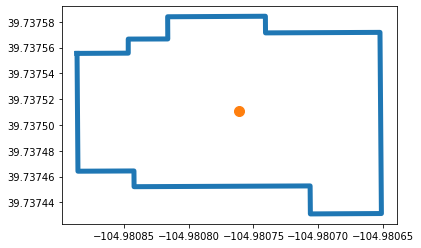

In [70]:
# show building shape with centroid marker
x,y = gdf_proj_latlon["geometry"].iloc[0].exterior.xy
fig, ax = plt.subplots()
# plot exterior 
plt.plot(x,y, linewidth=5)
# plot centroid
plt.plot(gdf_proj_latlon["geometry"].iloc[0].centroid.coords[0][0],
         gdf_proj_latlon["geometry"].iloc[0].centroid.coords[0][1], 
         'o',
         markersize=10)
# avoid scientific notation for lat/lon numbers
ax.ticklabel_format(useOffset=False)

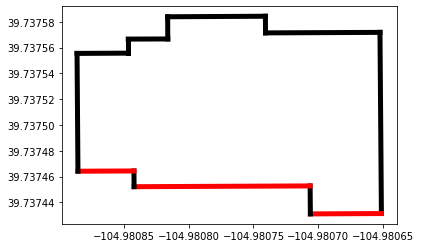

In [71]:
# show building south-facing walls in red
fig, ax = plt.subplots()
for i in range(0, len(x)-1):
  if abs(x[i+1] - x[i]) > 0:
    slope = (y[i+1] - y[i])/(x[i+1] - x[i])
    if abs(slope) < .05 and y[i] < gdf_proj_latlon["geometry"].iloc[0].centroid.coords[0][1]:
      plt.plot([ x[i], x[i+1]],[y[i], y[i+1]], "r", linewidth=5)
    else:
      plt.plot([ x[i], x[i+1]],[y[i], y[i+1]], "k", linewidth=5)
  else:
    plt.plot([ x[i], x[i+1]],[y[i], y[i+1]], "k", linewidth=5)

ax.ticklabel_format(useOffset=False)
